In [9]:
# Problem 2
# Starting here is the notebook used for running

import numpy as np
import pandas as pd
import os as os
import glob as glob
import csv as csv

import matplotlib.pyplot as plt

In [2]:
# Reused code written in Problem 1

def non_negative_matrix_factorization(X, W, H, R = 25, steps=1000, t=0.000001):
    
    # M: X in P2
    # U: W in P2
    # V: H in P2
    # R: Feature dimensions
    # steps: Iterations
    # t: Learning rate
    
    
    # Create object function list
    L_list = []
    
    isConverged = False
    L_prev = 1919810
    abc = True
    
    for step in range(steps):
        
        if(step % 200 == 0 and isConverged == False):
            print(step+1)
        
        if(isConverged == False):
            
            # Projected Gradient Method
            
            # Avoid repetitive cal
            WH_X = np.matmul(W, H) - X
            
            W = NMF_projection(W - t * (np.matmul(WH_X,H.T)))
            H = NMF_projection(H - t * (np.matmul(W.T,WH_X)))
            
            L = 0.5 * (np.linalg.norm( np.matmul(W,H)-X )**2)
            
            if(abc == True):   #abs((L-L_prev)/L) > 0.00001
                L_prev = L
                L_list.append(L_prev)
            else:
                isConverged = True
                
                print("Steps",step,L,L_prev,abs((L-L_prev)/L))
                
                L_prev = L
                L_list.append(L_prev)
            #Endif
            
        else:
            L_list.append(L_prev)
    
    #Endfor

    return W, H, L_list

In [3]:
def NMF_projection(M):
    
    projected = np.zeros([len(M), len(M[0])], dtype=float)
    
    for i in range(len(M)):
        for j in range(len(M[i])):
            projected[i][j] = max(0,M[i][j])
    #Endfor
    
    return projected

In [4]:
# Runtime starts here

# Init 
n_1 = 3012
n_2 = 8447
R = 25

L_list = []
X_predicted_list = []
W_list = []
H_list = []

In [5]:
#Read and convert input

X = np.zeros(n_1,n_2)
index = 0

for i in open("Prob2_nyt_data.txt","r"):
    
    row = (i.strip().split(","))
    
    for element in row:
        temp = element.split(":")
        X[int(temp[0]) - 1][index]= int(temp[1])
    #Endfor
    
    index+=1
#Endfor

In [7]:
# Runtime function
for codeRun in range(0,1):
    
    W = np.random.uniform(1,2,size=(n_1,R))
    H = np.random.uniform(1,2,size=(R,n_2))
    
    rtnW, rtnH, L_temp = non_negative_matrix_factorization(X, W, H, R)
    
    L_list.append(L_temp)
    X_predicted_list.append(np.matmul(rtnW, rtnH))
    W_list.append(rtnW)
    H_list.append(rtnH)

1
201
401
601
801
1
201
401
601
801


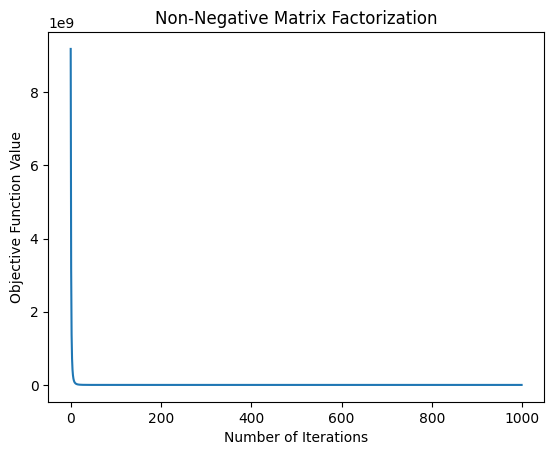

In [18]:
# Plot
plt.plot(L_list[0])
    
plt.title("Non-Negative Matrix Factorization")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
#plt.xscale("log")
#plt.yscale("log")
plt.show()

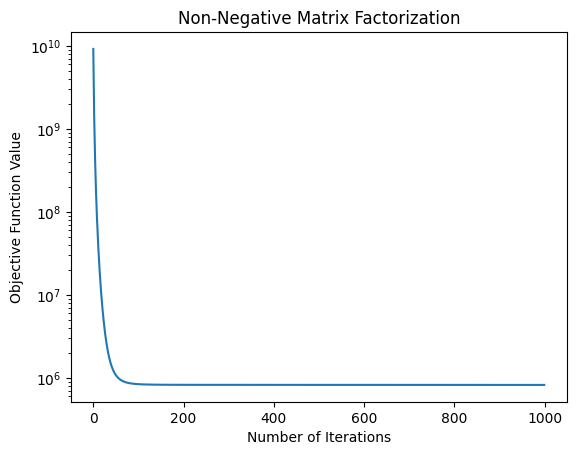

In [19]:
# Plot
plt.plot(L_list[0])
    
plt.title("Non-Negative Matrix Factorization")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
plt.yscale("log")
plt.show()

In [65]:
W_Matrix = np.array(W_list[0])

In [66]:
# Normalize

W_matrix = W_Matrix/W_Matrix.sum(axis=0,keepdims=1)
W_matrix.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
# Init dataframe
word_indicies = list(range(len(W_matrix)))
word_names = []

f = open("Prob2_nyt_vocab.dat","r")

for line in f:
    word_names.append(line.strip())
#Endfor

tbl_p2 = pd.DataFrame({"Word Index":word_indicies,"Word":word_names})
print(tbl_p2)

      Word Index         Word
0              0      company
1              1      percent
2              2        state
3              3         play
4              4     official
...          ...          ...
3007        3007      helpful
3008        3008  distinguish
3009        3009         glad
3010        3010       harder
3011        3011    lucrative

[3012 rows x 2 columns]


In [68]:
W_table = W_matrix.T
print(W_table[0])

[4.42606948e-03 5.50901440e-03 1.06215015e-03 ... 0.00000000e+00
 1.13624543e-03 8.27917068e-05]


In [69]:
for i in range(len(W_matrix[0])):
    temp = W_table[i]
    tbl_p2[str(i+1)] = temp

In [76]:
# Output words
for i in range(len(W_matrix[0])):
    df_temp = tbl_p2.sort_values(str(i+1),ascending=False)
    df_temp2 = df_temp[0:10][['Word', str(i+1)]]             #10 cloeset
    print(df_temp2)
    df_temp2.to_csv('existing.csv', mode='a', index=True)

          Word         1
35   yesterday  0.020403
26       start  0.014480
298     future  0.013961
87        feel  0.011338
36    business  0.009903
184       film  0.009133
328    product  0.009079
622    version  0.008507
303     dollar  0.007875
519     fourth  0.007712
        Word         2
1    percent  0.016606
50       put  0.014584
74    system  0.013955
13   program  0.012360
200  project  0.010919
25    second  0.010519
287    event  0.010161
23     place  0.010101
338    front  0.009873
128   create  0.009465
               Word         3
316         decline  0.016311
223           reach  0.013538
66              job  0.013233
38           change  0.011391
228           score  0.011350
339  administration  0.009844
252          mother  0.009839
672         success  0.009521
793          option  0.009153
272            word  0.008907
         Word         4
81     office  0.013987
20      child  0.012250
30     public  0.011150
70      write  0.010495
50        put  0.01020

In [80]:
# Export and convert file externally
cwd = os.getcwd()
df = pd.read_csv(cwd + "\\existing.csv", header=None)